# 05. CNN(Convolutional Neural Network) 실습
---




**목차**
> * 실습
  * 데이터
    1. 데이터 불러오기
    2. 데이터 분포 시각화
    3. 데이터 전처리
    4. 테스트셋 분리
  * 모델
    1. 모델 구현
    2. 학습
  * 성능평가
    1. Softmax regression
    2. DNN
* 과제


```
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
```

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## **실습**

---
### **데이터**
---

#### (1) **이미지 데이터의 특징**

#### **(2) MNIST 데이터셋**

In [ ]:
from tensorflow.keras import datasets
(x_train,y_train) ,(x_test,y_test) = datasets.mnist.load_data()
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

* 이미지 시각화

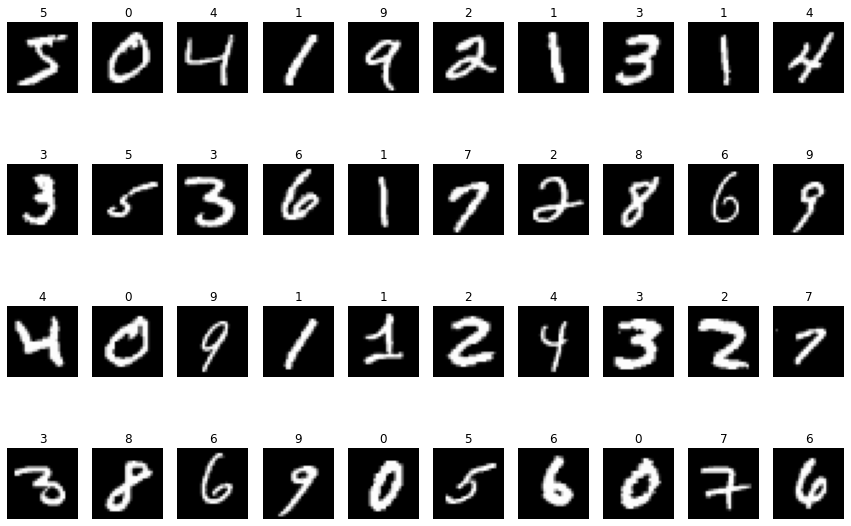

In [ ]:
plt.figure(figsize=(15,10))
for i in range(40):
  plt.subplot(4,10,i+1)
  plt.title(y_train[i])
  plt.imshow(x_train[i],cmap='gray')
  plt.axis('off')
plt.show()

#### **(3) 데이터 전처리**

* 분포 시각화

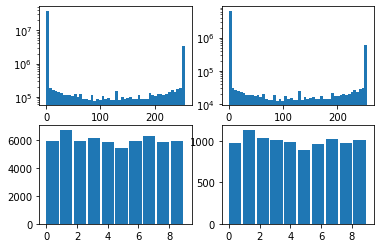

In [ ]:
plt.subplot(2,2,1)
plt.hist(x_train.flatten(),bins=50,log=True)

plt.subplot(2,2,2)
plt.hist(x_test.flatten(),bins=50,log=True)

plt.subplot(2,2,3)
plt.hist(y_train,width=0.8)

plt.subplot(2,2,4)
plt.hist(y_test,width=0.8)
plt.show()

* 정규화
  * `0~255` 사이의 값 → `0~1` 사이의 값으로 변환

In [ ]:
x_train = x_train/255
x_test = x_test/255

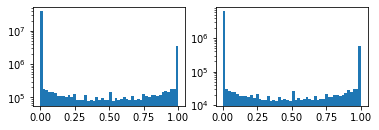

In [ ]:
plt.subplot(2,2,1)
plt.hist(x_train.flatten(),bins=50,log=True)

plt.subplot(2,2,2)
plt.hist(x_test.flatten(),bins=50,log=True)
plt.show()

* 텐서플로우 케라스 입력 형식으로 변환 (Batch size, W, H, C)

In [ ]:
x_train = np.expand_dims(x_train,3)
x_test = np.expand_dims(x_test,3)

In [ ]:
x_train.shape,x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

---
### **모델**
---

딥러닝 모델 구성과 학습과정은 크게 세가지로 나뉩니다.

* 모델 구현 : 원하는 레이어를 이용해 모델을 만듭니다.
* 컴파일: 학습전 적절한 손실함수와 적절한 옵티마이저를 정의해 줍니다.
* 학습: 학습을 진행합니다.

#### **(1) 모델구현**


In [ ]:
from tensorflow.keras import layers, models

* **Softmax regression**

In [ ]:
x = layers.Input(shape = (28,28,1))
z = layers.Flatten()(x)
y = layers.Dense(10,activation='softmax')(z)
sr = models.Model(x,y,name='SoftmaxRegression')
sr.summary()

Model: "SoftmaxRegression"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


* **DNN**

In [ ]:
x = layers.Input(shape = (28,28,1))
z = layers.Flatten()(x)
z = layers.Dense(256,activation = 'relu')(z)
z = layers.Dense(64,activation='relu')(z)
y = layers.Dense(10,activation='softmax')(z)
dnn = models.Model(x,y,name='DNN')
dnn.summary()

Model: "DNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               200960    
                                                                 
 dense_2 (Dense)             (None, 64)                16448     
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 218,058
Trainable params: 218,058
Non-trainable params: 0
_________________________________________________________________


* **CNN**

In [ ]:
x = layers.Input(shape = (28,28,1))
z = layers.Conv2D(3, 5 , activation='relu')(x)
z = layers.MaxPool2D(5)(z)

z = layers.Flatten()(z)
y = layers.Dense(10,activation='softmax')(z)

cnn = models.Model(x,y,name="CNN")
cnn.summary()

Model: "CNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 24, 24, 3)         78        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 4, 4, 3)          0         
 )                                                               
                                                                 
 flatten_2 (Flatten)         (None, 48)                0         
                                                                 
 dense_4 (Dense)             (None, 10)                490       
                                                                 
Total params: 568
Trainable params: 568
Non-trainable params: 0
_________________________________________________________________

#### **(2) 컴파일**


In [ ]:
from tensorflow.keras import optimizers

* **Softmax Regression**

In [ ]:
sr.compile(loss='sparse_categorical_crossentropy',
           optimizer=optimizers.SGD(learning_rate=0.01),
           metrics=['acc'])

* **DNN**

In [ ]:
dnn.compile(loss='sparse_categorical_crossentropy',
           optimizer=optimizers.SGD(learning_rate=0.01),
           metrics=['acc'])

* **CNN**

In [ ]:
cnn.compile(loss='sparse_categorical_crossentropy',
           optimizer=optimizers.SGD(learning_rate=0.01),
           metrics=['acc'])

#### **(3) 학습**

* **Softmax Regression**

In [ ]:
history_sr = sr.fit(x_train,y_train,epochs=10,batch_size = 32)

Epoch 1/10
1875/1875 [==============================] - 7s 2ms/step - loss: 0.7693 - acc: 0.8218
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4556 - acc: 0.8814
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4034 - acc: 0.8919
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3771 - acc: 0.8972
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3604 - acc: 0.9008
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3485 - acc: 0.9032
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3395 - acc: 0.9061
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3325 - acc: 0.9077
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3265 - acc: 0.9090
Epoch 10/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3216 - acc: 0.9107


* **DNN**

In [ ]:
history_dnn = dnn.fit(x_train,y_train,epochs=10,batch_size = 32)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6175 - acc: 0.8366
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2816 - acc: 0.9194
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2283 - acc: 0.9345
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1944 - acc: 0.9448
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1688 - acc: 0.9522
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1492 - acc: 0.9572
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1332 - acc: 0.9624
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1202 - acc: 0.9659
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1093 - acc: 0.9689
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0997 - acc: 0.9717


* **CNN**

In [ ]:
history_cnn = cnn.fit(x_train,y_train,epochs=10,batch_size = 32)

Epoch 1/10
1875/1875 [==============================] - 13s 3ms/step - loss: 1.2313 - acc: 0.5962
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6194 - acc: 0.8094
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5130 - acc: 0.8452
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3950 - acc: 0.8831
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3112 - acc: 0.9079
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2658 - acc: 0.9222
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2398 - acc: 0.9289
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2235 - acc: 0.9335
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2131 - acc: 0.9360
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2038 - acc: 0.9390


---
### **성능평가**
---

* 혼돈행렬 플롯

In [ ]:
from sklearn import metrics
def plot_cm(model,x_test,y_test):
  y_pred = model.predict(x_test)
  print(y_pred.shape)
  m = metrics.confusion_matrix(y_test,np.argmax(y_pred,axis=1))
  print(m)
  sns.heatmap(m,annot=True)
  plt.show()

* 학습 커브 플롯

In [ ]:
def plot_lcurve(history): 
  acc_plot = history.history['acc']
  loss_plot = history.history['loss']

  fig, loss_ax = plt.subplots()
  acc_ax = loss_ax.twinx()

  acc_ax.plot(acc_plot, c = 'orangered',label='Acc',marker='.')
  loss_ax.plot(loss_plot, c= 'dodgerblue', label='Loss',marker='.')

  acc_ax.set_ylabel("accuracy")
  loss_ax.set_ylabel('loss')
  acc_ax.legend(loc='upper center')
  loss_ax.legend()
  plt.show()

#### **(1) Softmax Regression**

* 테스트셋 평가

In [ ]:
sr.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3065 - acc: 0.9166


[0.30652815103530884, 0.9165999889373779]

* 혼돈 행렬

(10000, 10)
[[ 958    0    2    2    0    7    8    1    2    0]
 [   0 1102    2    4    1    3    4    1   18    0]
 [   9    4  910   15   15    2   14   17   39    7]
 [   4    0   22  919    0   28    2    9   16   10]
 [   1    2    7    1  908    0   11    2    8   42]
 [  10    4    5   38   10  768   15    7   27    8]
 [  12    3    4    2   10   14  911    1    1    0]
 [   3   12   23    8    8    0    0  932    3   39]
 [   6    7   10   25    9   26   13   14  853   11]
 [  11    8    3   10   37    9    0   21    5  905]]


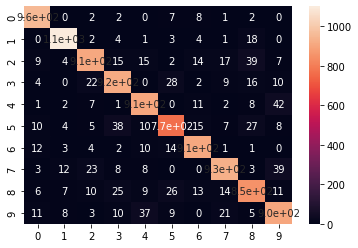

In [ ]:
plot_cm(sr,x_test,y_test)

* 학습과정 시각화

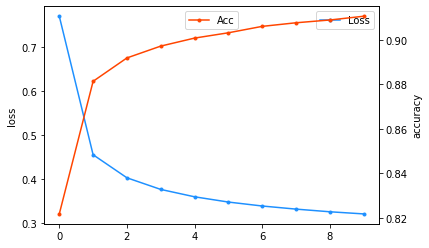

In [ ]:
plot_lcurve(history_sr)

#### **(2) DNN**

* 테스트셋 평가

In [ ]:
dnn.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.1057 - acc: 0.9680


[0.10573962330818176, 0.9679999947547913]

* 혼돈 행렬

(10000, 10)
[[ 962    0    1    2    1    5    5    1    2    1]
 [   0 1117    4    1    0    0    4    2    7    0]
 [   5    0 1001    3    3    1    3    9    5    2]
 [   1    0    5  980    0    8    0    8    3    5]
 [   1    0    5    0  946    0    3    2    2   23]
 [   3    1    1    9    3  859    7    1    6    2]
 [   8    3    2    1    6    9  924    1    4    0]
 [   0    5   15    2    1    0    0  992    1   12]
 [   3    1    4   11    3    4    3    8  934    3]
 [   3    5    1    9   12    3    1    9    1  965]]


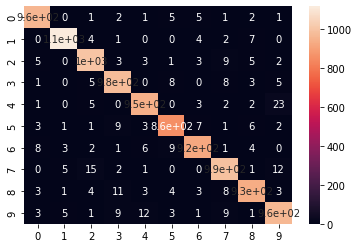

In [ ]:
plot_cm(dnn,x_test,y_test)

* 학습과정 시각화

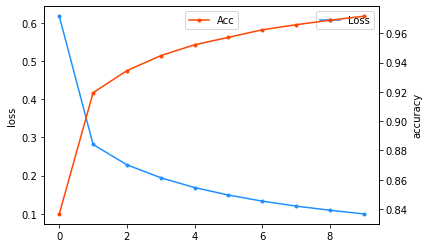

In [ ]:
plot_lcurve(history_dnn)

#### **(3) CNN**


* 테스트셋 평가

In [ ]:
cnn.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.1931 - acc: 0.9428


[0.1930517703294754, 0.942799985408783]

* 혼돈 행렬

(10000, 10)
[[ 958    1    2    0    0    3    7    4    5    0]
 [   0 1122    4    1    1    0    4    0    3    0]
 [   6    3  976   15    5    2    5   11    7    2]
 [   1    1    9  956    0    6    0    9   22    6]
 [   4    1    2    1  919    0   18    6    5   26]
 [   6    5    2   15    4  821   15    4   12    8]
 [   8    2    4    1    3    7  930    0    3    0]
 [   3    4   37   16    5    0    0  930   18   15]
 [  13    4    6   17    8   12    5    6  879   24]
 [   7    3    1    8   14   11    1    9   18  937]]


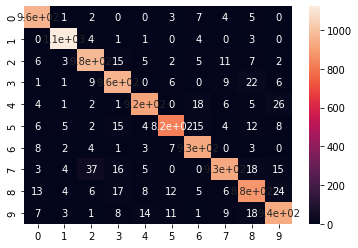

In [ ]:
plot_cm(cnn,x_test,y_test)

* 학습과정 시각화

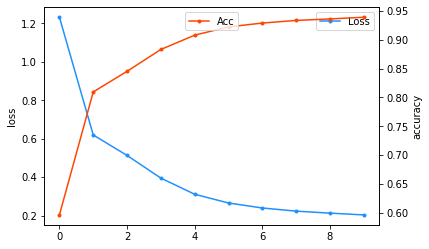

In [ ]:
plot_lcurve(history_cnn)

## **과제**


---
### **과제01**
---

위에서 만든 CNN 모델을 변형하여 성능을 올려 보세요.
* 모델 구조를 변경해보세요(레이어 추가 혹은 가중치 차원 증가)
* 훈련시 로스함수와 옵티마이저함수를 조정해보세요
* 훈련시 학습회수와 배치사이즈를 조정해보세요

In [ ]:
x = layers.Input(shape = (28,28,1))
z = layers.Conv2D(3, 8 , activation='relu')(x)
z = layers.MaxPool2D(8)(z)
z = layers.Conv2D(3, 4 , activation='relu')(x)
z = layers.MaxPool2D(4)(z)

z = layers.Flatten()(z)
y = layers.Dense(10,activation='softmax')(z)

cnn = models.Model(x,y,name="CNN")
cnn.summary()

Model: "CNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_5 (Conv2D)           (None, 25, 25, 3)         51        
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 6, 6, 3)          0         
 2D)                                                             
                                                                 
 flatten_5 (Flatten)         (None, 108)               0         
                                                                 
 dense_7 (Dense)             (None, 10)                1090      
                                                                 
Total params: 1,141
Trainable params: 1,141
Non-trainable params: 0
_____________________________________________________________

In [ ]:
cnn.compile(loss='sparse_categorical_crossentropy',
           optimizer='adam',
           metrics=['acc'])

In [ ]:
history_cnn = cnn.fit(x_train,y_train,epochs=30,batch_size = 16)

Epoch 1/30
3750/3750 [==============================] - 19s 5ms/step - loss: 0.1722 - acc: 0.9481
Epoch 2/30
3750/3750 [==============================] - 13s 4ms/step - loss: 0.1515 - acc: 0.9543
Epoch 3/30
3750/3750 [==============================] - 13s 4ms/step - loss: 0.1403 - acc: 0.9574
Epoch 4/30
3750/3750 [==============================] - 14s 4ms/step - loss: 0.1313 - acc: 0.9600
Epoch 5/30
3750/3750 [==============================] - 13s 4ms/step - loss: 0.1250 - acc: 0.9619
Epoch 6/30
3750/3750 [==============================] - 14s 4ms/step - loss: 0.1194 - acc: 0.9625
Epoch 7/30
3750/3750 [==============================] - 13s 4ms/step - loss: 0.1155 - acc: 0.9639
Epoch 8/30
3750/3750 [==============================] - 13s 4ms/step - loss: 0.1110 - acc: 0.9652
Epoch 9/30
3750/3750 [==============================] - 13s 4ms/step - loss: 0.1085 - acc: 0.9654
Epoch 10/30
3750/3750 [==============================] - 13s 3ms/step - loss: 0.1060 - acc: 0.9664
Epoch 11/30
3750/37

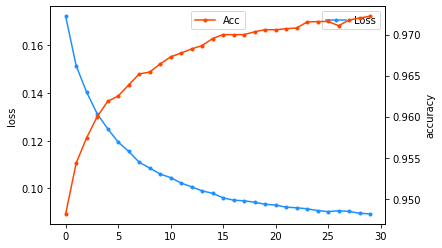

In [ ]:
plot_lcurve(history_cnn)

---
### **과제02**
---
데이콘에서 아래 의류이미지 데이터를 다운받고 CNN을 이용해서 분류하세요. 테스트셋을 예측하고 리더보드에 제출하세요

https://dacon.io/competitions/open/235594/data

* 데이터 불러오기

In [ ]:
from google.colab import files
files.upload()

Saving sample_submission.csv to sample_submission.csv
Saving test.csv to test.csv
Saving train.csv to train.csv


In [ ]:
import seaborn as sns
import pandas
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [ ]:
x_train = train.drop(["index","label"],axis=1)
y_train = train['label']

test_index = test['index']
x_test = test.drop(['index'], 1)

In [ ]:
x_train = np.array(x_train).reshape(-1,28,28,1)
test = np.array(test).reshape(-1,28,28,1)

NameError: ignored

* 데이터 확인

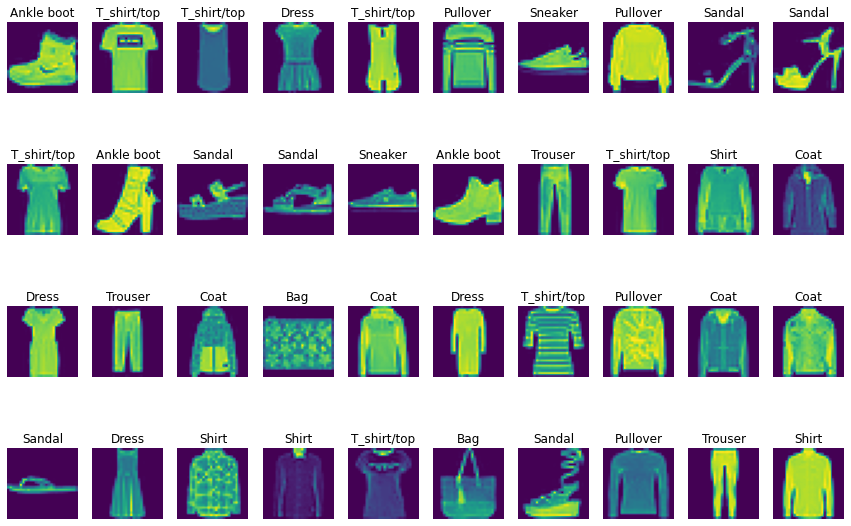

In [ ]:
plt.figure(figsize=(15,10))
class_names = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
for i in range(40):
  plt.subplot(4,10,i+1)
  plt.title(class_names[y_train[i]])
  plt.imshow(x_train[i])
  plt.axis('off')
plt.show()

* 데이터 시각화

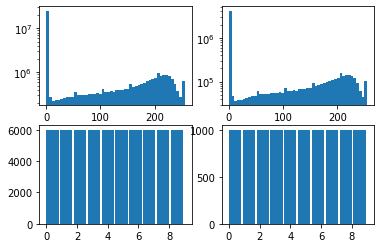

In [ ]:
plt.subplot(2,2,1)
plt.hist(x_train.flatten(),bins=50,log=True)

plt.subplot(2,2,2)
plt.hist(x_test.flatten(),bins=50,log=True)

plt.subplot(2,2,3)
plt.hist(y_train,width=0.8)

plt.show()

* 데이터 전처리

* 정규화 (255rgb)

In [ ]:
x_train = x_train/255
x_test = x_test/255

* 정규화 확인

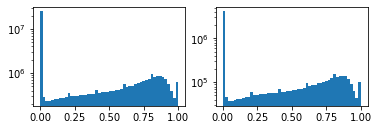

In [ ]:
plt.subplot(2,2,1)
plt.hist(x_train.flatten(),bins=50,log=True)

plt.subplot(2,2,2)
plt.hist(x_test.flatten(),bins=50,log=True)
plt.show()

In [ ]:
x = layers.Input(shape = (28,28,1))
z = layers.Conv2D(32, 3 , activation='relu')(x)
z = layers.MaxPool2D(2)(z)
z = layers.Conv2D(64, 3 , activation='relu')(z)
z = layers.MaxPool2D(2)(z)
z = layers.Dropout(0.25)(z)
z = layers.Flatten()(z)
z = layers.Dense(128, activation='relu')(z)
z = layers.Dropout(0.5)(z)
y = layers.Dense(10,activation='softmax')(z)

cnn = models.Model(x,y,name="CNN")
cnn.summary()

Model: "CNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_16 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 64)          0       

In [ ]:
cnn.compile(loss='sparse_categorical_crossentropy',
           optimizer='adam',
           metrics=['acc'])

In [ ]:
history_cnn = cnn.fit(x_train,y_train,epochs=30,batch_size = 16)

Epoch 1/30
3750/3750 [==============================] - 18s 5ms/step - loss: 0.5580 - acc: 0.7962
Epoch 2/30
3750/3750 [==============================] - 17s 4ms/step - loss: 0.3848 - acc: 0.8608
Epoch 3/30
3750/3750 [==============================] - 17s 4ms/step - loss: 0.3437 - acc: 0.8745
Epoch 4/30
3750/3750 [==============================] - 17s 4ms/step - loss: 0.3155 - acc: 0.8847
Epoch 5/30
3750/3750 [==============================] - 17s 5ms/step - loss: 0.2988 - acc: 0.8910
Epoch 6/30
3750/3750 [==============================] - 18s 5ms/step - loss: 0.2853 - acc: 0.8962
Epoch 7/30
3750/3750 [==============================] - 19s 5ms/step - loss: 0.2708 - acc: 0.9000
Epoch 8/30
3750/3750 [==============================] - 22s 6ms/step - loss: 0.2602 - acc: 0.9025
Epoch 9/30
3750/3750 [==============================] - 17s 4ms/step - loss: 0.2562 - acc: 0.9046
Epoch 10/30
3750/3750 [==============================] - 17s 5ms/step - loss: 0.2437 - acc: 0.9089
Epoch 11/30
3750/37

In [ ]:
cnn.evaluate(x_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.2636 - acc: 0.9133


[0.2636016011238098, 0.9132999777793884]

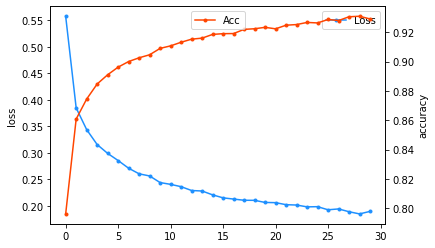

In [ ]:
plot_lcurve(history_cnn)

* 정답 저장

In [ ]:
x_test

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,9,8,0,0,34,29,7,0,11,24,0,0,3,3,1,0,1,1,0,0,0,0,0,4,0,0,1,0,0,0,0,0,44,...,242,245,224,245,234,0,3,0,0,0,0,0,0,0,0,0,0,0,0,37,69,94,123,127,138,138,142,145,135,125,103,87,56,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,209,190,181,150,170,193,180,219,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24,235,...,248,238,80,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,174,233,155,0,65,235,216,34,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,14,53,99,17,0,0,0,0,0,0,0,0,12,94,68,14,0,0,0,0,0,0,0,0,0,0,0,38,106,94,89,94,68,2,...,0,0,0,0,0,0,87,12,26,0,0,0,0,0,0,0,46,50,29,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,63,53,31,0,0,0
3,0,0,0,0,0,0,0,0,0,161,212,138,150,169,164,176,202,255,183,26,0,0,0,0,0,0,0,0,0,0,0,1,0,0,129,221,255,255,215,184,...,255,255,254,252,255,101,196,254,252,100,0,0,0,0,0,168,232,225,0,41,172,147,148,153,155,146,137,141,143,137,137,126,140,0,133,224,222,56,0,0
4,0,0,0,0,0,0,0,0,0,0,37,0,0,0,0,0,0,17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,21,204,235,235,...,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,69,0,2,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,37,93,72,58,55,63,66,89,159,120,20,0,0,0,0,1,0,0,0,0,0,0,1,0,0,22,67,125,151,168,198,...,112,115,117,117,113,146,41,0,3,0,0,0,0,0,0,0,1,0,1,76,54,55,51,53,53,55,53,44,38,37,32,23,14,20,0,0,1,0,0,0
9996,0,0,0,0,0,0,0,0,0,0,0,76,36,110,170,78,136,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,68,115,...,94,84,70,44,0,36,152,65,110,0,0,0,0,0,0,0,21,57,89,7,0,0,0,0,0,0,0,0,0,0,0,0,0,2,52,23,28,0,0,0
9997,0,0,0,0,0,0,0,0,0,0,1,3,0,14,152,184,158,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,...,219,223,226,239,247,241,224,213,144,0,0,0,0,0,0,1,0,44,232,199,200,190,180,179,185,189,191,185,179,178,175,172,172,182,199,222,42,0,1,0
9998,0,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,131,192,79,0,0,0,0,0,...,13,26,17,8,0,0,0,0,0,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [ ]:
y_pred = cnn.predict(x_test)
y_pred.shape

(10000, 10)

In [ ]:
y_pred=np.argmax(y_pred,axis=1)
y_pred.shape

(10000,)

In [ ]:
submission =pd.read_csv("sample_submission.csv")

In [ ]:
submission['label']=y_pred

In [ ]:
submission.to_csv("submission.csv",index=False)